In [112]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score
from collections import Counter

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
#df = pd.read_csv('household_power_consumption.txt', sep= ';')

In [114]:
df = pd.read_csv('housing-pricing.csv')

In [115]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [116]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [117]:
df.dropna(subset=['total_bedrooms'], inplace=True)

(array([1295., 5396., 5608., 3711., 1795., 1097.,  506., 1025.,    0.,
           0.]),
 array([     0.,  70000., 140000., 210000., 280000., 350000., 420000.,
        490000., 560000., 630000., 700000.]),
 <BarContainer object of 10 artists>)

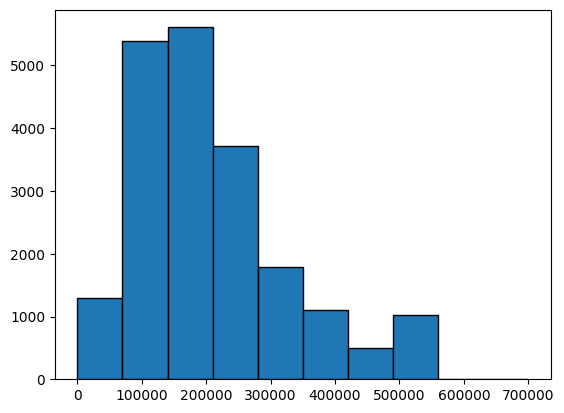

In [118]:
plt.hist(df['median_house_value'], range=[0, 700000], edgecolor='black')

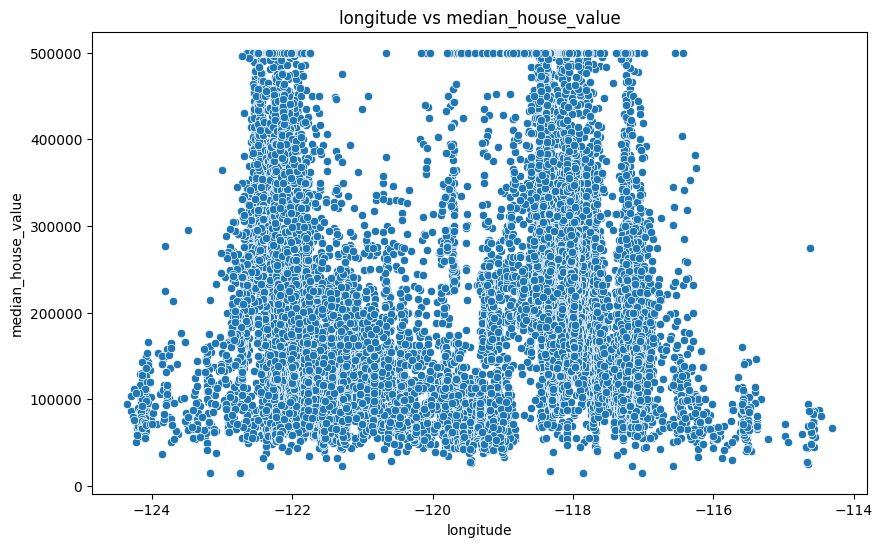

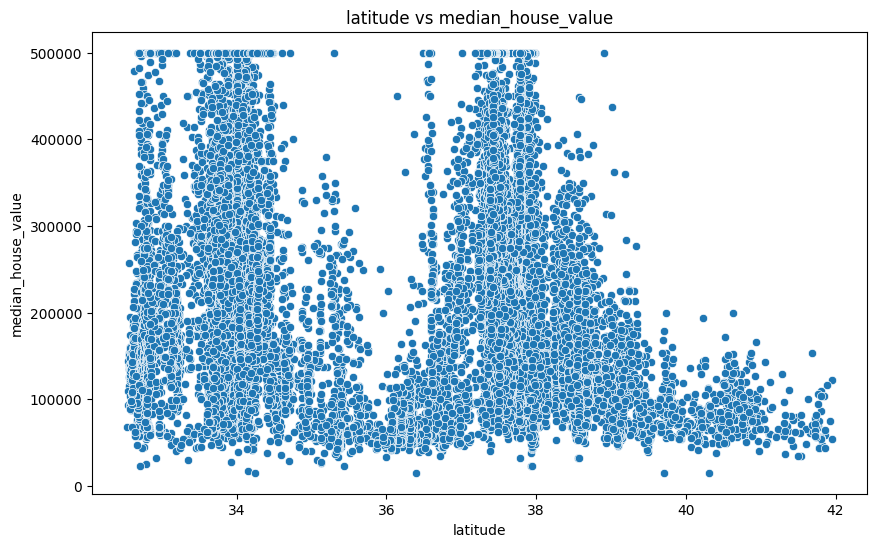

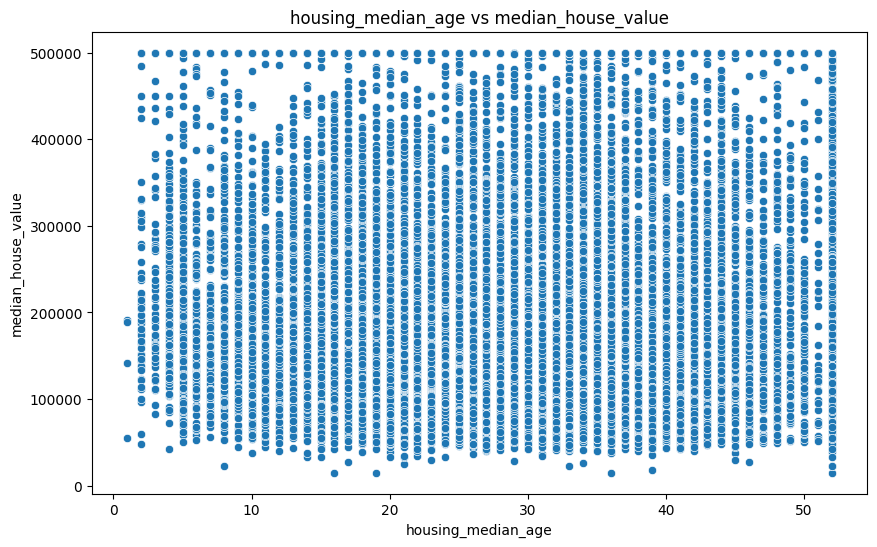

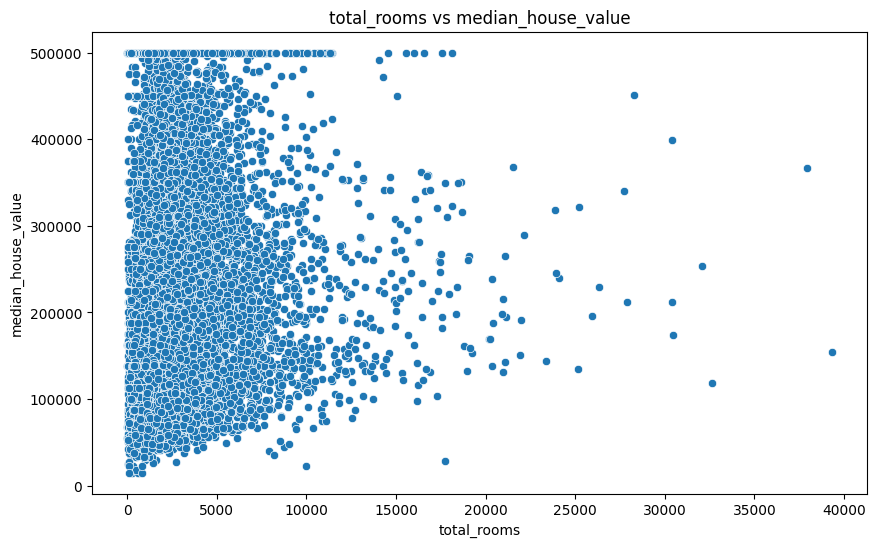

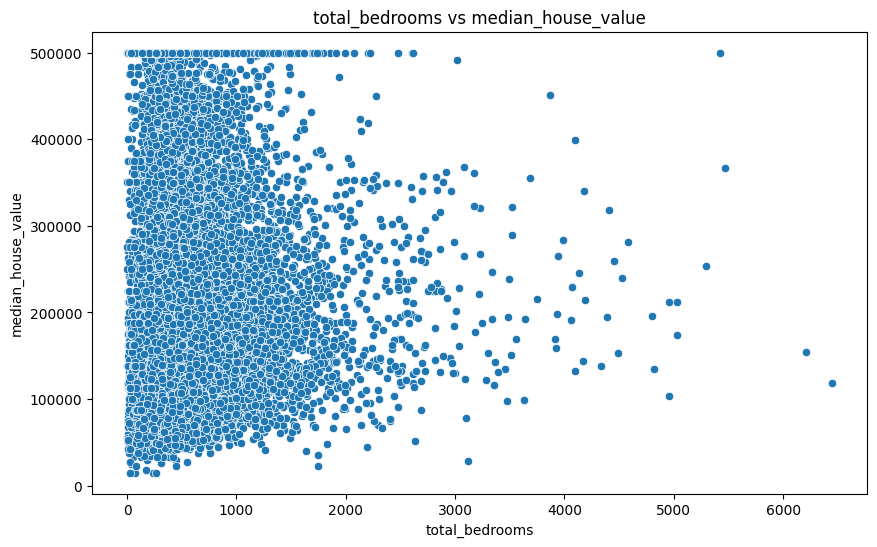

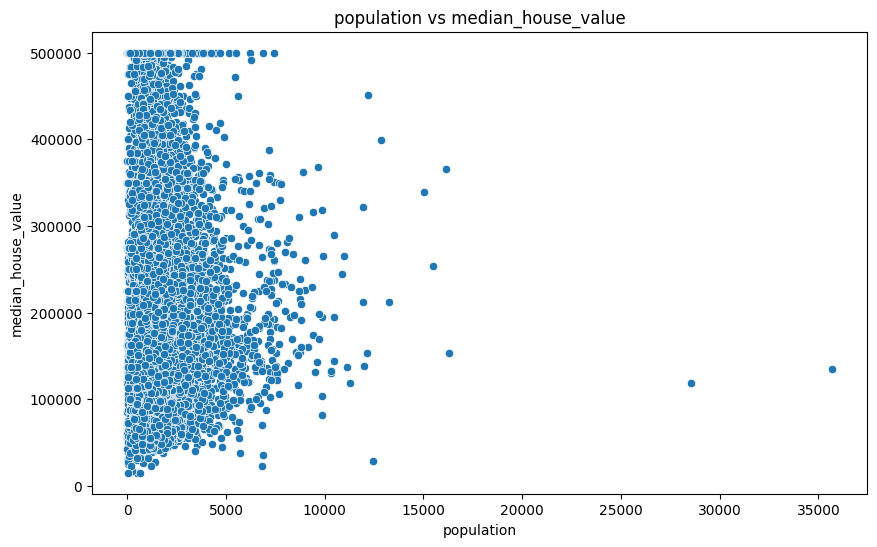

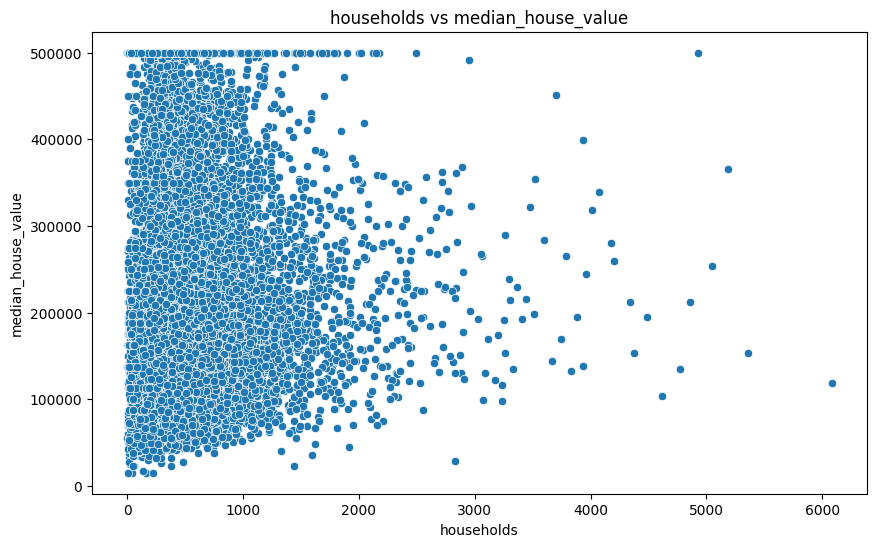

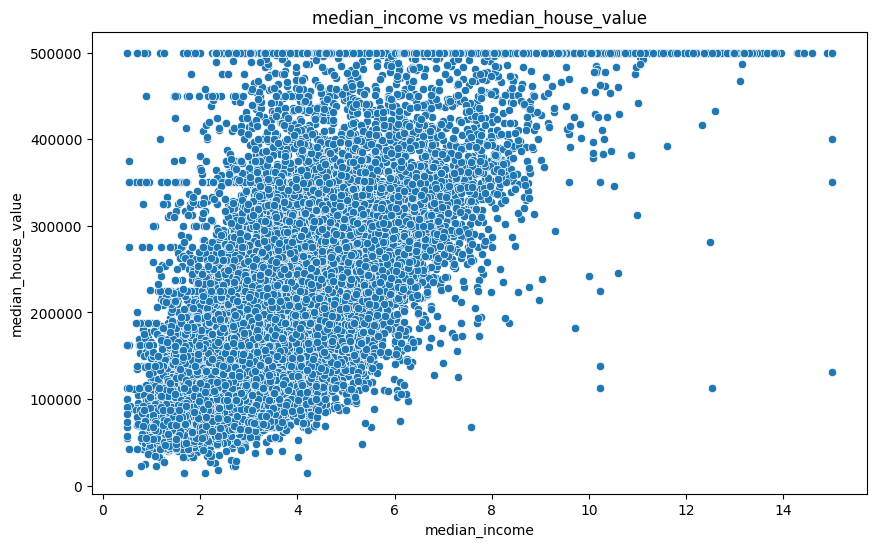

In [119]:
target_column = 'median_house_value'

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if column != target_column:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[column], y=df[target_column])
        plt.ylim()
        plt.title(f'{column} vs {target_column}')
        plt.show()

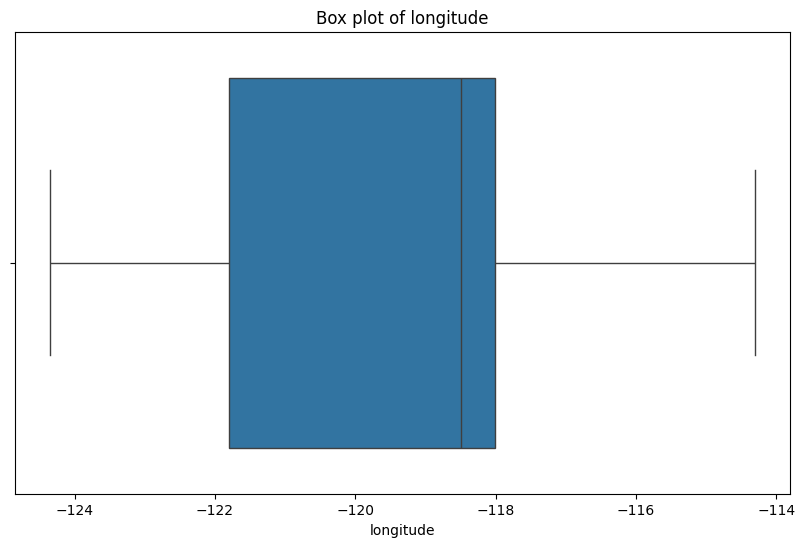

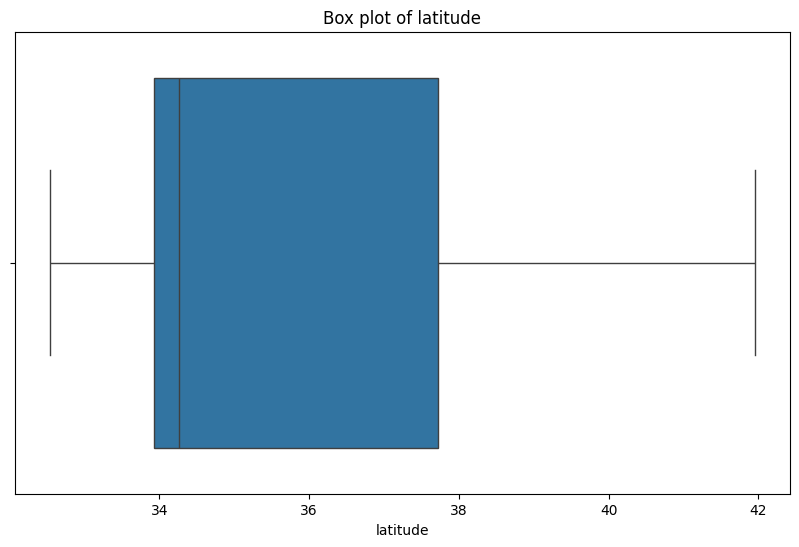

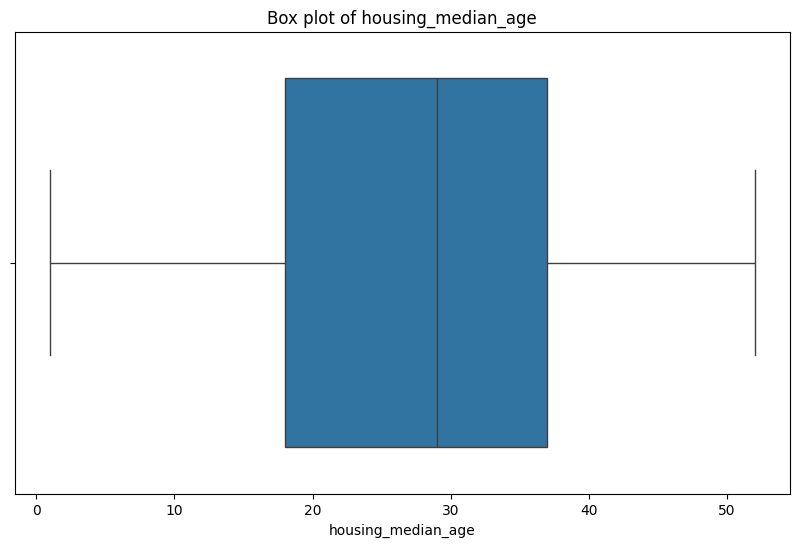

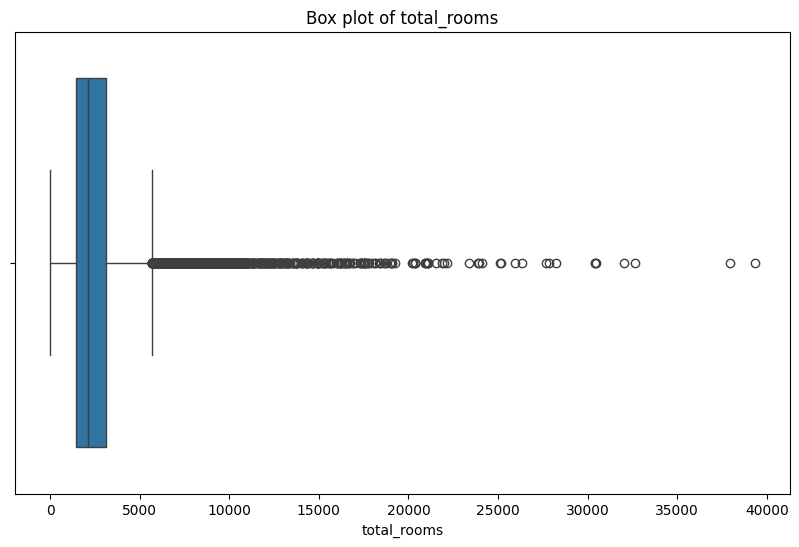

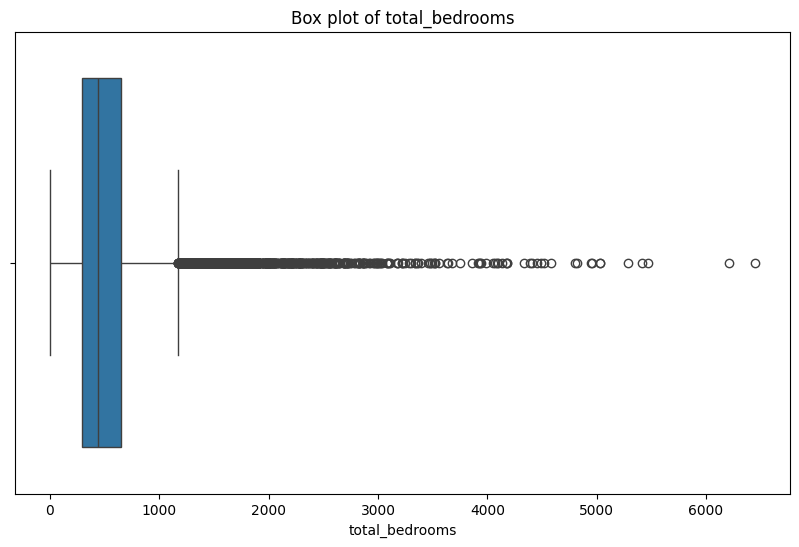

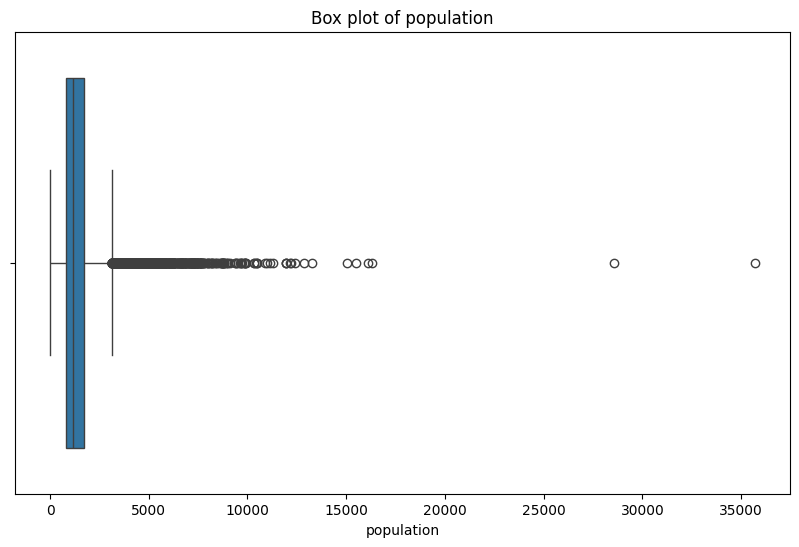

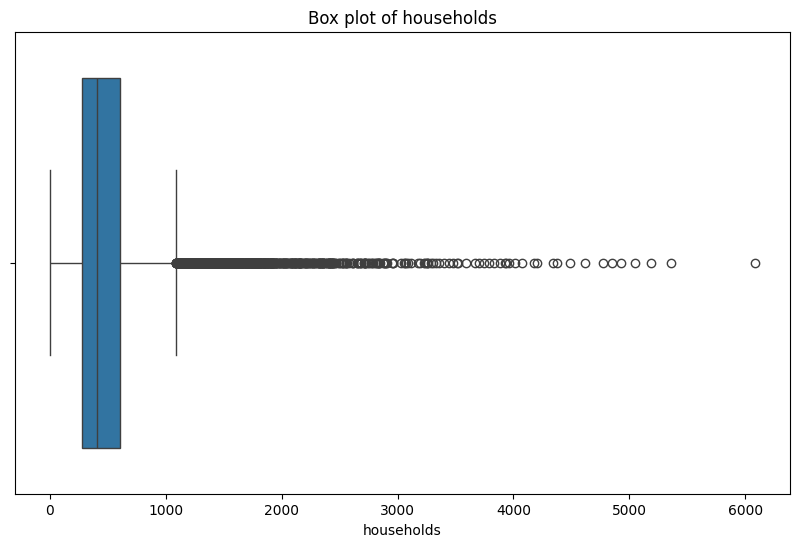

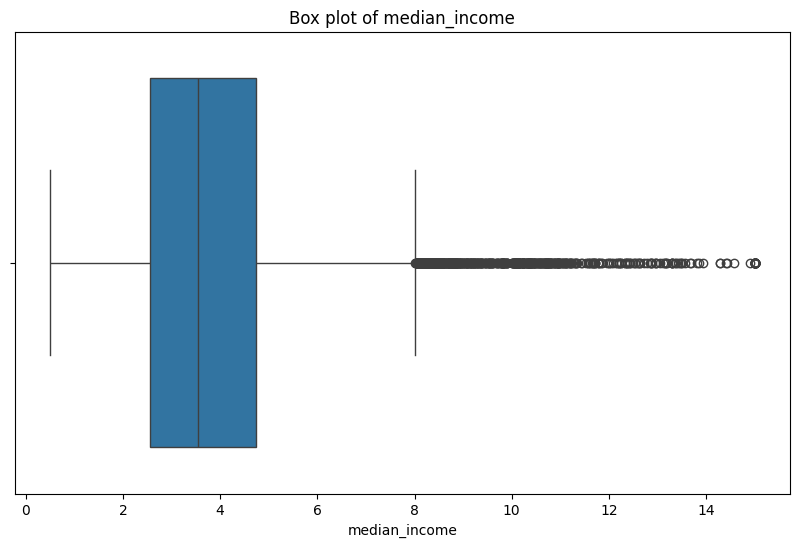

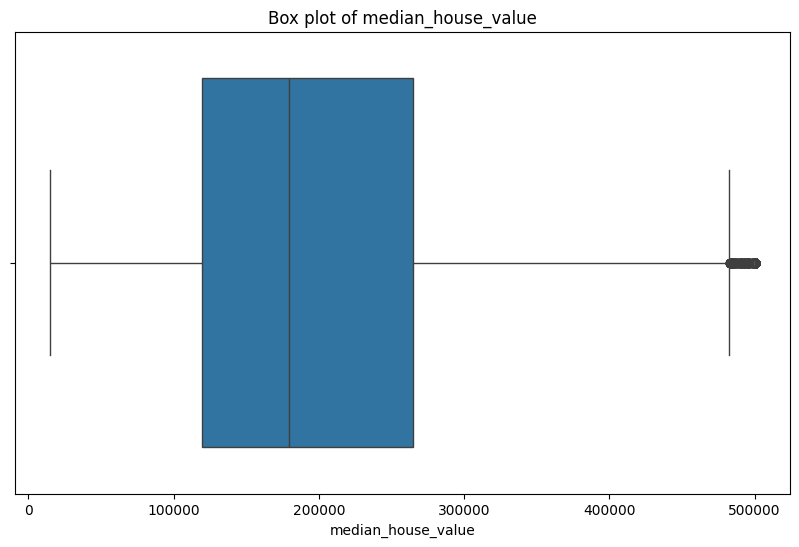

In [120]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [121]:
df['total_bedrooms'] = df['total_bedrooms'].astype(int)

In [122]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,342200


In [123]:
df = df[(df['population'] < 25000) & (df['total_rooms'] < 35000)]

In [124]:
X= df.drop(columns= ['median_house_value', 'ocean_proximity'])
Y= df['median_house_value']

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [126]:
knn_regressor = KNeighborsRegressor(n_neighbors=15)
knn_regressor.fit(x_train, y_train)
predknn = knn_regressor.predict(x_test)

mse = mean_squared_error(y_test, predknn)
r2 = r2_score(y_test, predknn)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 8979280721.13
R^2 Score: 0.33


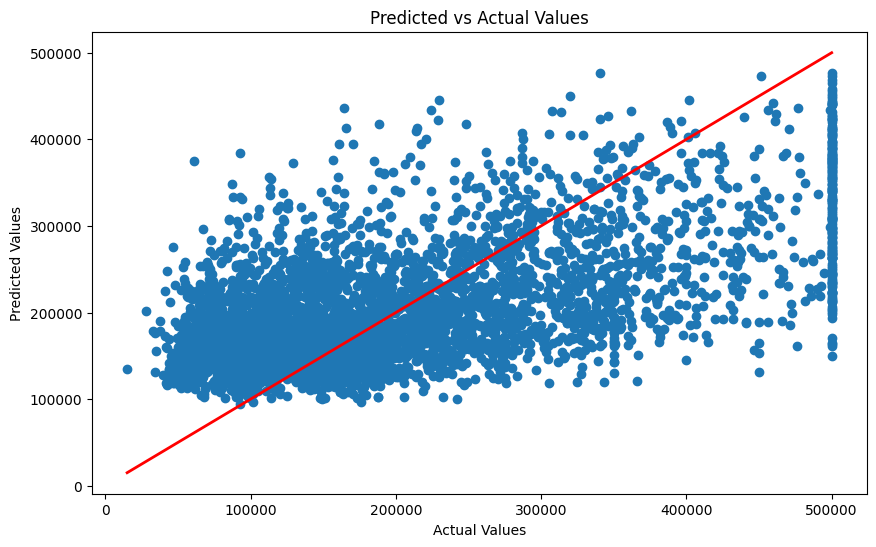

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predknn)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [128]:
normalizer= MinMaxScaler()

normalizer.fit(x_train)

MinMaxScaler()

Mean Squared Error (MSE): 6082538478.69
Root Mean Squared Error (RMSE): 77990.63
Mean Absolute Error (MAE): 50630.26
R-squared (R²): 0.55


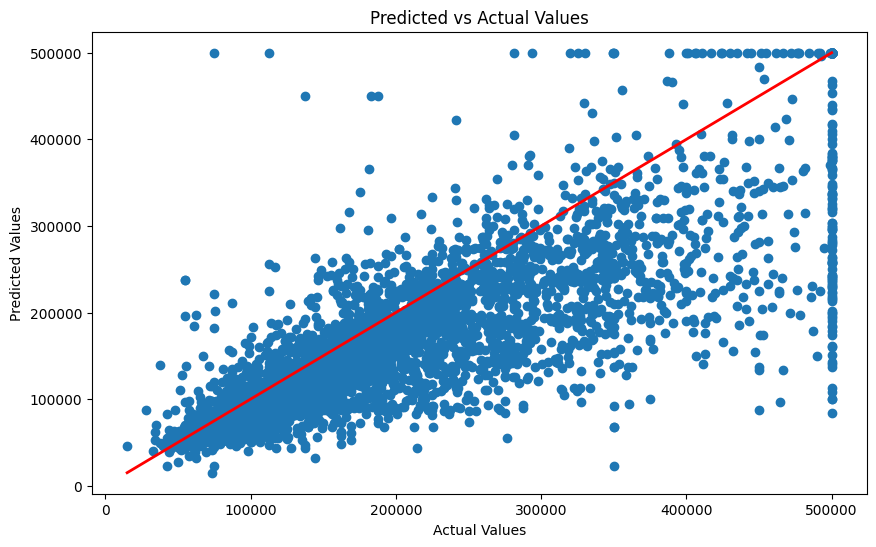

In [129]:
#KNN WITH MINMAX NORMALIZER

x_train_minmax = normalizer.transform(x_train)

x_test_minmax = normalizer.transform(x_test)

knn = KNeighborsClassifier(n_neighbors= 3)

knn.fit(x_train_minmax, y_train)

predknnminmax= knn.predict(x_test_minmax)
mse = mean_squared_error(y_test, predknnminmax)
r2 = r2_score(y_test, predknnminmax)

mse = mean_squared_error(y_test, predknnminmax)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predknnminmax)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# R-squared (R²)
r2 = r2_score(y_test, predknnminmax)
print(f"R-squared (R²): {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predknnminmax)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [130]:
normalizer= StandardScaler()

normalizer.fit(x_train)

StandardScaler()

Mean Squared Error (MSE): 6255165223.87
Root Mean Squared Error (RMSE): 79089.60
Mean Absolute Error (MAE): 51914.77
R-squared (R²): 0.54


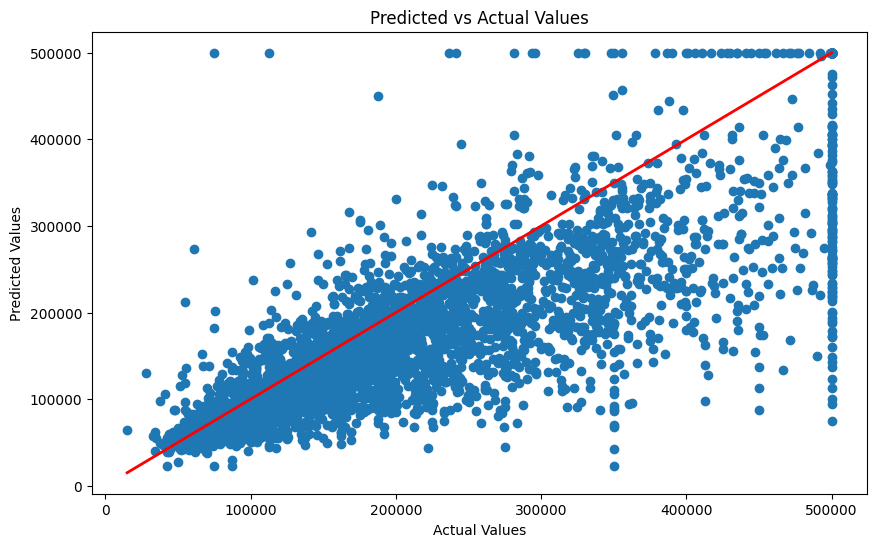

In [131]:
#KNN WITH STANDARD NORMALIZER


x_train_sta = normalizer.transform(x_train)

x_test_sta = normalizer.transform(x_test)

knn = KNeighborsClassifier(n_neighbors= 3)

knn.fit(x_train_sta, y_train)

predknnsta= knn.predict(x_test_sta)

mse = mean_squared_error(y_test, predknnsta)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predknnsta)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# R-squared (R²)
r2 = r2_score(y_test, predknnsta)
print(f"R-squared (R²): {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predknnsta)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [132]:
max(y_train) # Cambiar la escala del target 

500001

Mean Squared Error (MSE): 4737742024.92
Root Mean Squared Error (RMSE): 68831.26
Mean Absolute Error (MAE): 50943.74
R-squared (R²): 0.65


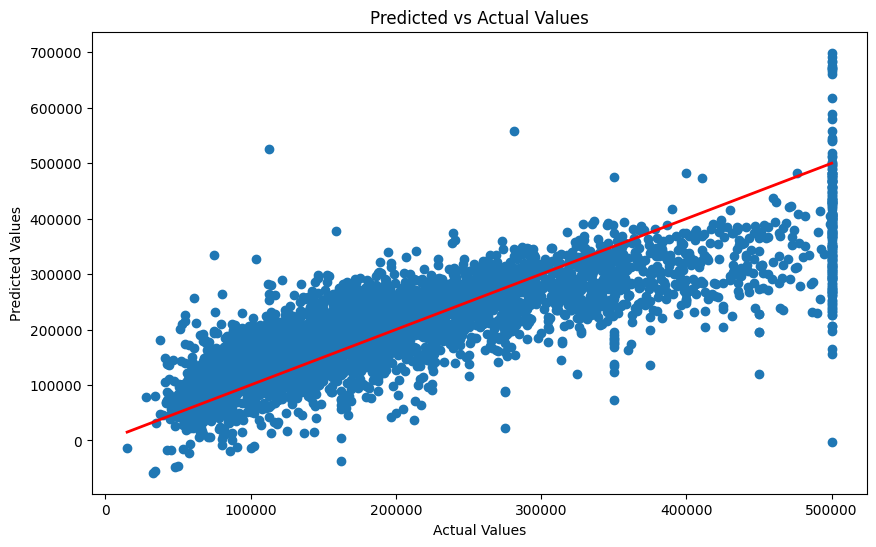

Intercept: 0.8117421523846329
              Feature  Coefficient
0           longitude     0.176254
1            latitude     0.198511
2  housing_median_age     0.563794
3         total_rooms     0.349889
4      total_bedrooms     1.000000
5          population     0.000000
6          households     0.729588
7       median_income     0.975917


In [133]:
#LINEAR REGRESSION WITH MINMAX NORMALIZER

normalizer= MinMaxScaler()
normalizer.fit(x_train)
x_train_minmax = normalizer.transform(x_train)
x_test_minmax = normalizer.transform(x_test)

linear_regressor = LinearRegression()
linear_regressor.fit(x_train_minmax, y_train)

coefficients = linear_regressor.coef_
intercept = linear_regressor.intercept_

coefficients_min = coefficients.min()
coefficients_max = coefficients.max()
coefficients_normalized = (coefficients - coefficients_min) / (coefficients_max - coefficients_min)


intercept_normalized = (intercept - coefficients_min) / (coefficients_max - coefficients_min)


coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefficients_normalized
})


pred_linreg_minmax = linear_regressor.predict(x_test_minmax)

mse = mean_squared_error(y_test, pred_linreg_minmax)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_linreg_minmax)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# R-squared (R²)
r2 = r2_score(y_test, pred_linreg_minmax)
print(f"R-squared (R²): {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_linreg_minmax)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()


print(f"Intercept: {intercept_normalized}")
print(coef_df)

Mean Squared Error (MSE): 4737742024.92
Root Mean Squared Error (RMSE): 68831.26
Mean Absolute Error (MAE): 50943.74
R-squared (R²): 0.65


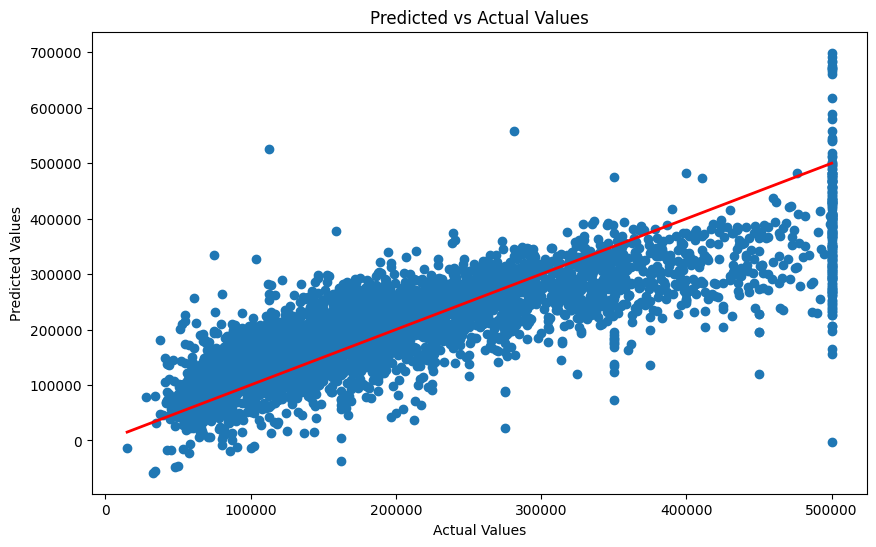

In [134]:
#LINEAR REGRESSION WITH STANDARD NORMALIZER

normalizer= StandardScaler()
normalizer.fit(x_train)
x_train_sta = normalizer.transform(x_train)
x_test_sta = normalizer.transform(x_test)

linear_regressor = LinearRegression()
linear_regressor.fit(x_train_sta, y_train)

pred_linreg_sta = linear_regressor.predict(x_test_sta)

mse = mean_squared_error(y_test, pred_linreg_sta)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_linreg_sta)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# R-squared (R²)
r2 = r2_score(y_test, pred_linreg_sta)
print(f"R-squared (R²): {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_linreg_sta)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

Mean Squared Error (MSE): 3923221025.81
Root Mean Squared Error (RMSE): 62635.62
Mean Absolute Error (MAE): 44863.58
R-squared (R²): 0.71


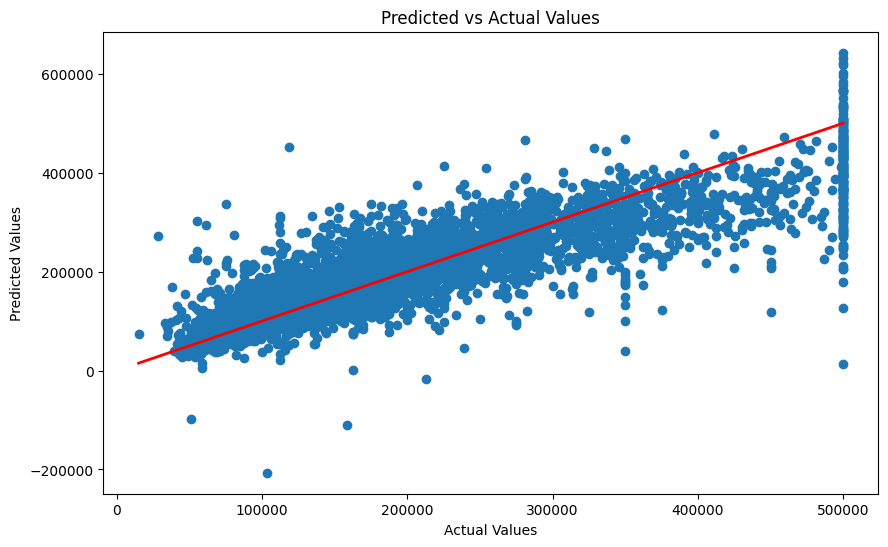

Normalized Intercept: 0.49513977930179787
                              Feature  Coefficient
0                                   1     0.475195
1                           longitude     0.431034
2                            latitude     0.423016
3                  housing_median_age     0.495850
4                         total_rooms     0.191009
5                      total_bedrooms     0.766750
6                          population     0.403786
7                          households     0.490105
8                       median_income     0.608540
9                         longitude^2     0.502324
10                 longitude latitude     0.544556
11       longitude housing_median_age     0.445560
12              longitude total_rooms     0.719733
13           longitude total_bedrooms     0.275585
14               longitude population     0.524220
15               longitude households     0.407557
16            longitude median_income     0.369871
17                         latitude^2   

In [135]:
#POLINOMIAL REGRESSION WITH MINMAX NORMALIZER

normalizer= MinMaxScaler()
normalizer.fit(x_train)
x_train_minmax = normalizer.transform(x_train)
x_test_minmax = normalizer.transform(x_test)

degree = 2
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(x_train_minmax)
X_test_poly = poly_features.transform(x_test_minmax)

poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

coefficients = poly_regressor.coef_
intercept = poly_regressor.intercept_

coefficients_min = coefficients.min()
coefficients_max = coefficients.max()
coefficients_normalized = (coefficients - coefficients_min) / (coefficients_max - coefficients_min)
intercept_normalized = (intercept - coefficients_min) / (coefficients_max - coefficients_min)

feature_names = poly_features.get_feature_names_out(input_features=X.columns)


coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients_normalized
})


pred_poly = poly_regressor.predict(X_test_poly)

mse = mean_squared_error(y_test, pred_poly)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_poly)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# R-squared (R²)
r2 = r2_score(y_test, pred_poly)
print(f"R-squared (R²): {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_poly)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

print(f"Normalized Intercept: {intercept_normalized}")
print(coef_df)

#IT GIVES EXACTLY THE SAME RESULT AS DONE WITH A STANDARDSCALER. VIF 

In [136]:
normalizer= MinMaxScaler()
normalizer.fit(x_train)
x_train_minmax = normalizer.transform(x_train)
x_test_minmax = normalizer.transform(x_test)

degree = 2
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(x_train_minmax)
X_test_poly = poly_features.transform(x_test_minmax)

poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)


LinearRegression()

In [137]:
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()), 
    ('ridge_regressor', Ridge())
])


param_grid = {
    'poly_features__degree': [1, 2],  
    'ridge_regressor__alpha': [0.01, 1, 10]  
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly_features', PolynomialFeatures()),
                                       ('ridge_regressor', Ridge())]),
             param_grid={'poly_features__degree': [1, 2],
                         'ridge_regressor__alpha': [0.01, 1, 10]},
             scoring='neg_mean_squared_error')

In [138]:
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_search.best_estimator_


Best Hyperparameters: {'poly_features__degree': 2, 'ridge_regressor__alpha': 0.01}


In [147]:

pred_poly_grid = best_model.predict(x_test_minmax)

ValueError: X has 8 features, but PolynomialFeatures is expecting 45 features as input.

Mean Squared Error (MSE): 3352158365.01
Root Mean Squared Error (RMSE): 57897.83
Mean Absolute Error (MAE): 41001.58
R-squared (R²): 0.75


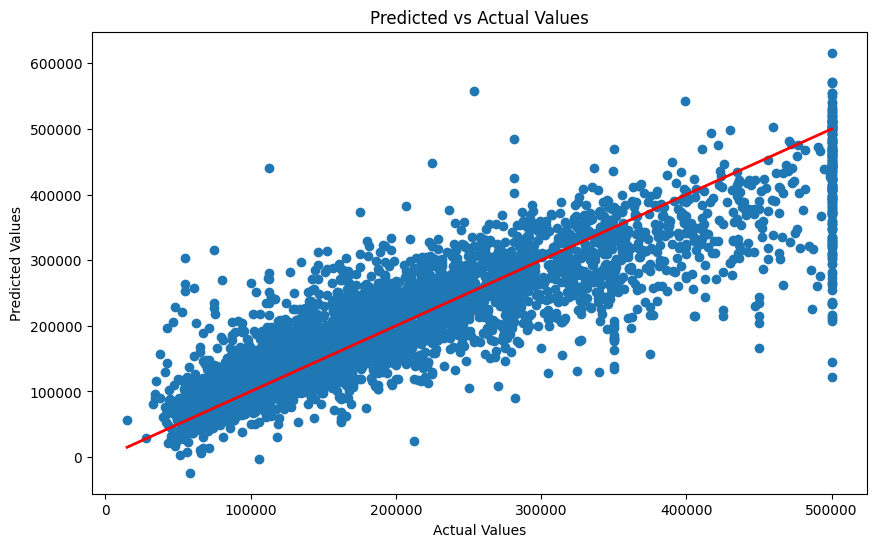

In [148]:
mse = mean_squared_error(y_test, pred_poly_grid)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_poly_grid)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# R-squared (R²)
r2 = r2_score(y_test, pred_poly_grid)
print(f"R-squared (R²): {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_poly_grid)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [152]:
feature_names = poly_features.get_feature_names_out(input_features=X.columns)


In [153]:
poly_df = pd.DataFrame(X_test_poly, columns=feature_names)
poly_df['Actual House Price'] = y_test
poly_df['Predicted House Price'] = pred_poly

In [156]:
#POLINOMIAL REGRESSION WITH MINMAX NORMALIZER

# Export the DataFrame to a CSV file
poly_df.to_csv('Housing Regression model.csv', index=False)

#IT GIVES EXACTLY THE SAME RESULT AS DONE WITH A STANDARDSCALER. VIF 